In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from xgboost import XGBRegressor

In [53]:
calories_data = pd.read_csv('Dataset/calories.csv')
calories_data.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [54]:
exercise_data = pd.read_csv('Dataset/exercise.csv')
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [55]:
calories_data = pd.concat([exercise_data,calories_data['Calories']],axis = 1)
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [56]:
calories_data.shape

(15000, 9)

In [57]:
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [58]:
calories_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [59]:
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [60]:
encoder = LabelEncoder()

In [61]:
calories_data['Gender'] = encoder.fit_transform(calories_data['Gender'])

In [62]:
calories_data['Gender'].value_counts()

Gender
0    7553
1    7447
Name: count, dtype: int64

In [63]:
correlation = calories_data.corr()

<Axes: >

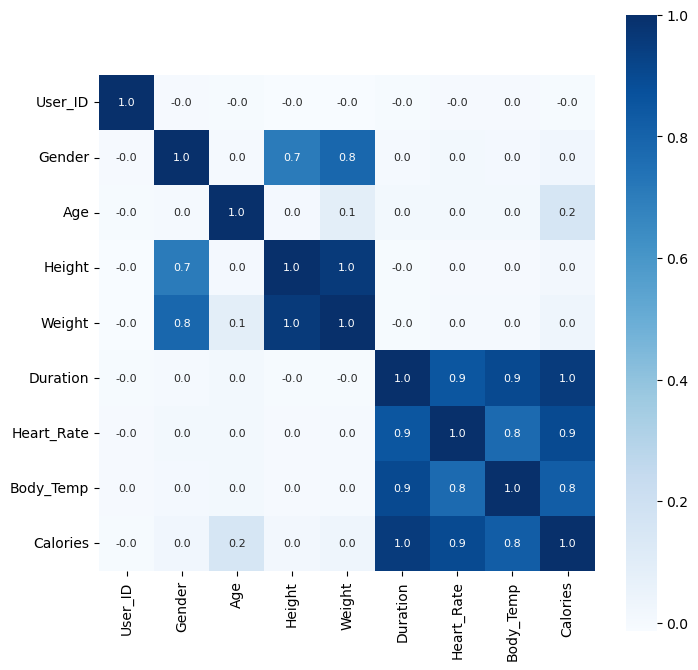

In [64]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [69]:
features = calories_data.drop(columns=['User_ID','Calories'],axis = 1)
target = calories_data['Calories']

In [70]:
features

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,1,68,190.0,94.0,29.0,105.0,40.8
1,0,20,166.0,60.0,14.0,94.0,40.3
2,1,69,179.0,79.0,5.0,88.0,38.7
3,0,34,179.0,71.0,13.0,100.0,40.5
4,0,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...
14995,0,20,193.0,86.0,11.0,92.0,40.4
14996,0,27,165.0,65.0,6.0,85.0,39.2
14997,0,43,159.0,58.0,16.0,90.0,40.1
14998,1,78,193.0,97.0,2.0,84.0,38.3


In [71]:
target

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64

In [73]:
features_train,features_test,target_train,target_test = train_test_split(features,target,test_size=0.2,random_state=2)
print(features.shape,features_train.shape,features_test.shape)
print(target.shape,target_train.shape,target_test.shape)

(15000, 7) (12000, 7) (3000, 7)
(15000,) (12000,) (3000,)


In [75]:
regressor = XGBRegressor()

In [76]:
regressor.fit(features_train,target_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [80]:
training_prediction = regressor.predict(features_train)
training_r2 = metrics.r2_score(training_prediction,target_train)
print('R Squared error on training data is ',training_r2)

testing_prediction = regressor.predict(features_test)
testing_r2 = metrics.r2_score(testing_prediction,target_test)
print('R Squared error on testing data is ',testing_r2)

R Squared error on training data is  0.9995692990241353
R Squared error on testing data is  0.9987986496259049
